
https://doi.org/10.3844/jcssp.2020.1401.1416

https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/

https://www.tensorflow.org/tutorials/structured_data/time_series

In [15]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [65]:
import models
import importlib
importlib.reload(models)

<module 'models' from '/Users/robmoore/Documents/GitHub/zoomcamp-ts-project/models.py'>

In [16]:
from utils import (
    build_dataframe,
    build_window,
    build_model,
    evaluate_model,
    summarize_scores,
    plot_scores,
    generate_actuals_and_predictions,
    plot_results,
    build_model_for_tuning,
    load_model
)

import pickle

import functools

import pandas as pd

import keras_tuner as kt

In [17]:
df = build_dataframe("^GSPC")

df

,low,open,close,volume,high,adjclose
date,,,,,,
1999-01-04,1219.099976,1229.229980,1228.099976,877000000,1248.810059,1228.099976
1999-01-05,1228.099976,1228.099976,1244.780029,775000000,1246.109985,1244.780029
1999-01-06,1244.780029,1244.780029,1272.339966,986900000,1272.500000,1272.339966
1999-01-07,1257.680054,1272.339966,1269.729980,863000000,1272.339966,1269.729980
1999-01-08,1261.819946,1269.729980,1275.089966,937800000,1278.239990,1275.089966
...,...,...,...,...,...,...
2019-12-24,3220.510010,3225.449951,3223.379883,1296540000,3226.429932,3223.379883
2019-12-26,3227.199951,3227.199951,3239.909912,2160680000,3240.080078,3239.909912
2019-12-27,3234.370117,3247.229980,3240.020020,2428670000,3247.929932,3240.020020


In [18]:
label_columns = ["adjclose"]
window, scaler = build_window(df, label_columns)

In [19]:
window.test_df[16:]

,adjclose
date,
2017-12-15,4.449782
2017-12-18,4.496949
2017-12-19,4.468386
2017-12-20,4.461089
2017-12-21,4.478575
...,...
2019-12-24,6.249621
2019-12-26,6.303955
2019-12-27,6.304317


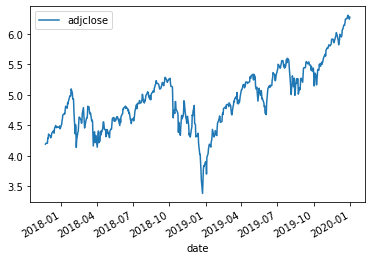

In [20]:
window.test_df.plot();

## Last

In [21]:
score_map = {}
day_slice = slice(-63, -1)

model_name = "last"
model = build_model(model_name, window, epochs=1)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

Training:   0%|           0/1 ETA: ?s,  ?epochs/s

Epoch 1/1


0/132           ETA: ?s - 

last: [43.693] 1: 25.7, 2: 30.9, 3: 35.0, 4: 38.8, 5: 42.2, 6: 45.4, 7: 48.2, 8: 51.0, 9: 53.5, 10: 55.9


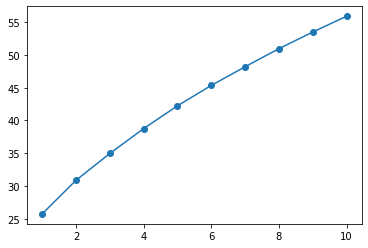

In [22]:
summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

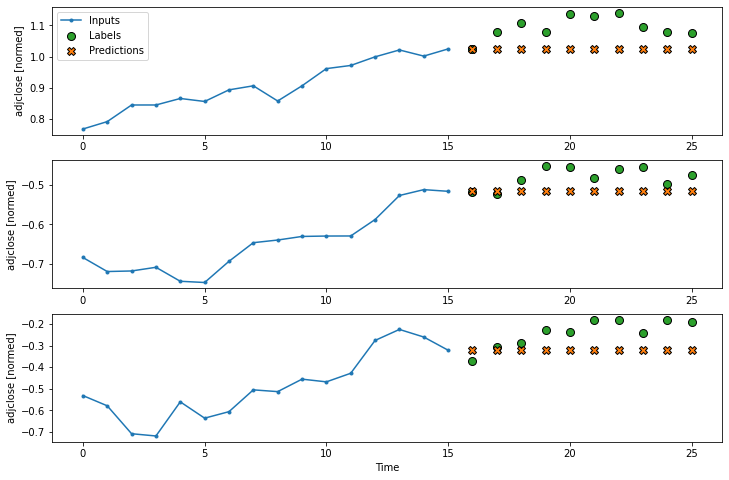

In [23]:
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

In [24]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_results_partial = functools.partial(plot_results, actuals, predictions, window)

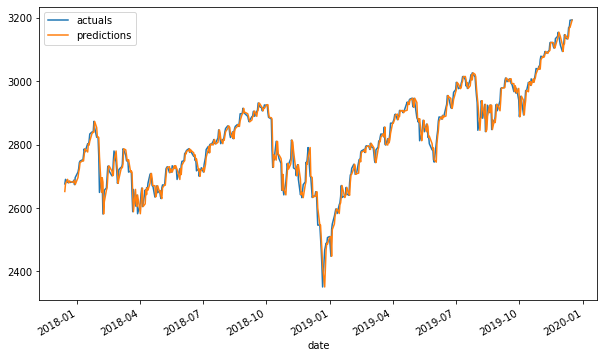

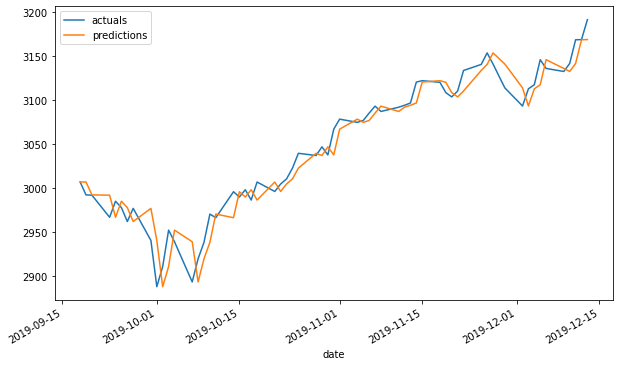

In [25]:
plot_results_partial()
plot_results_partial(day_slice=day_slice)

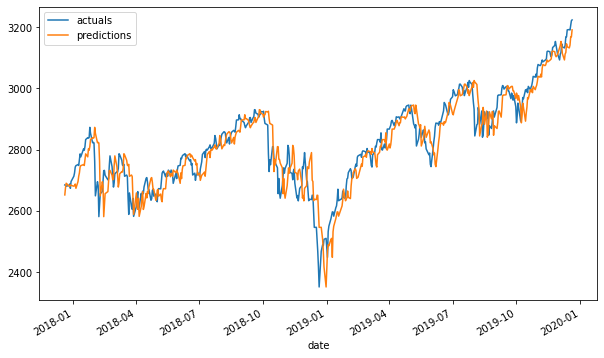

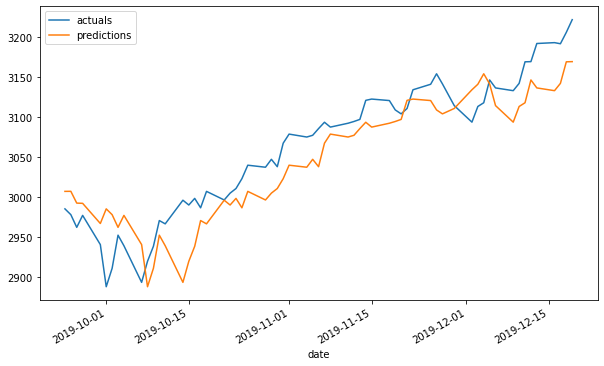

In [26]:
plot_results_partial(4)
plot_results_partial(4, day_slice=day_slice)

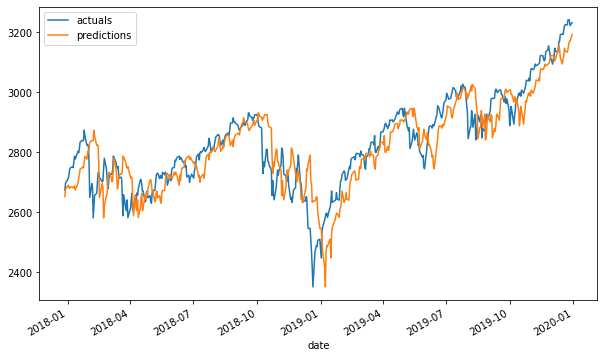

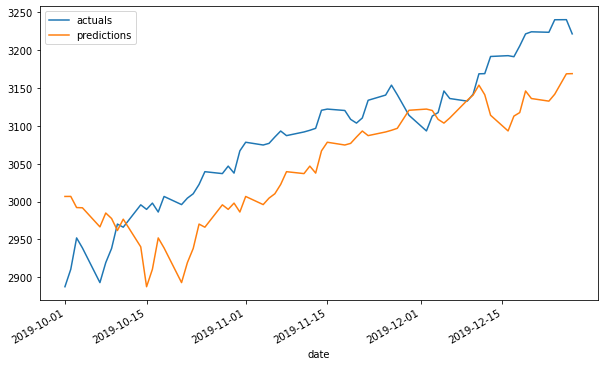

In [27]:
plot_results_partial(9)
plot_results_partial(9, day_slice=day_slice)

## Repeat

In [28]:
model_name = "repeat"
model = build_model(model_name, window, epochs=1)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

Training:   0%|           0/1 ETA: ?s,  ?epochs/s

Epoch 1/1


0/132           ETA: ?s - 

repeat: [77.258] 1: 77.1, 2: 77.1, 3: 77.2, 4: 77.2, 5: 77.2, 6: 77.3, 7: 77.3, 8: 77.3, 9: 77.4, 10: 77.4


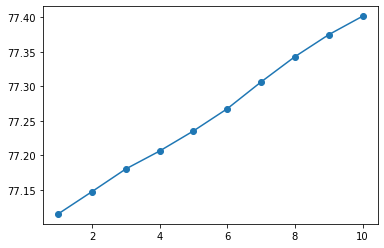

In [29]:
summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

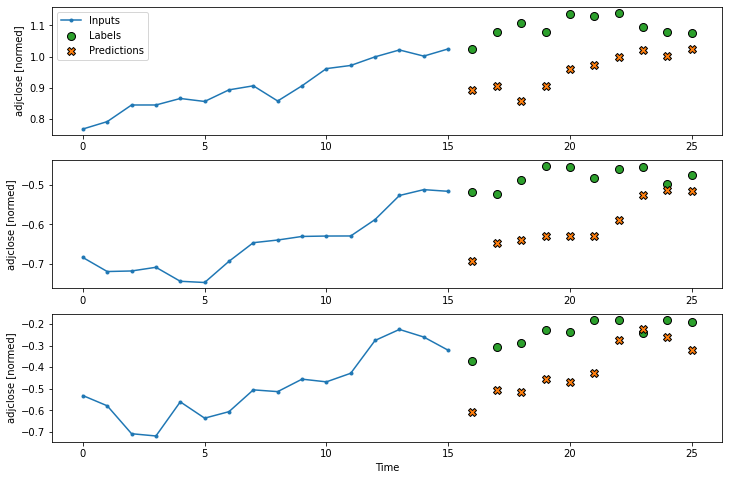

In [30]:
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

In [31]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_results_partial = functools.partial(plot_results, actuals, predictions, window)

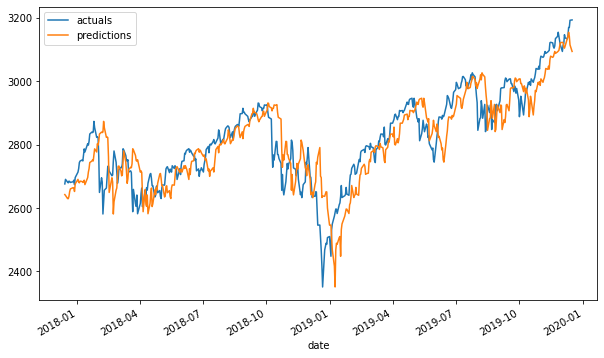

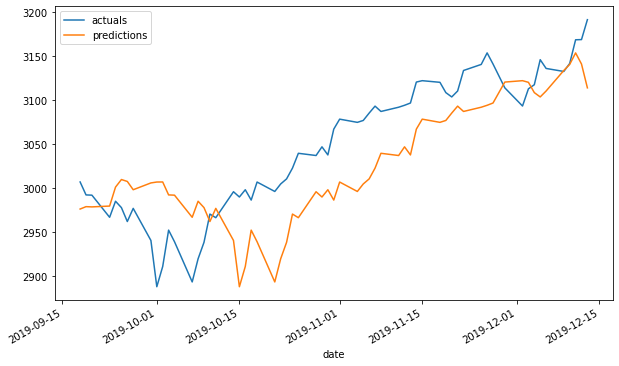

In [32]:
plot_results_partial()
plot_results_partial(day_slice=day_slice)

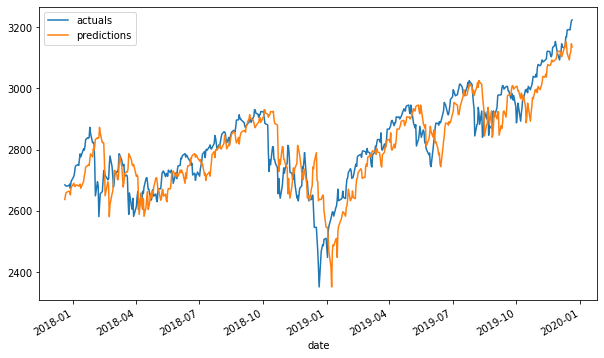

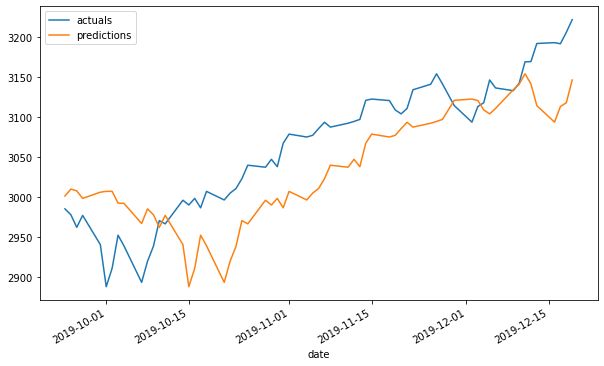

In [33]:
plot_results_partial(4)
plot_results_partial(4, day_slice=day_slice)

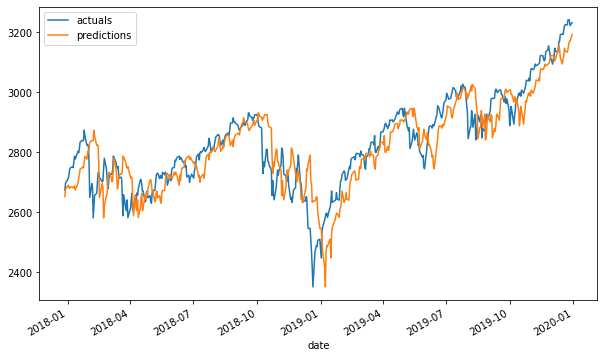

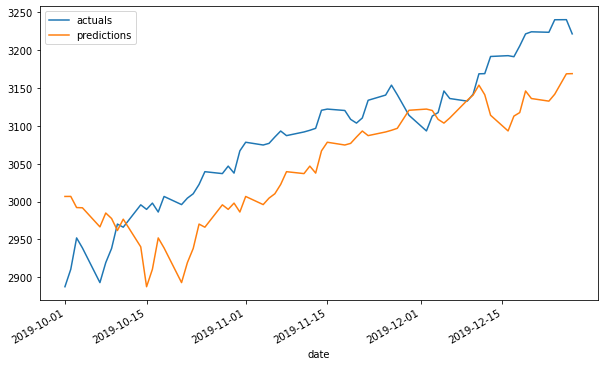

In [34]:
plot_results_partial(9)
plot_results_partial(9, day_slice=day_slice)

## LSTM

In [35]:
model_name = "lstm"
model = build_model(model_name, window)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

Training:   0%|           0/1000 ETA: ?s,  ?epochs/s

Epoch 1/1000


0/132           ETA: ?s - 

Epoch 2/1000


0/132           ETA: ?s - 

Epoch 3/1000


0/132           ETA: ?s - 

Epoch 4/1000


0/132           ETA: ?s - 

Epoch 5/1000


0/132           ETA: ?s - 

Epoch 6/1000


0/132           ETA: ?s - 

Epoch 7/1000


0/132           ETA: ?s - 

Epoch 8/1000


0/132           ETA: ?s - 

Epoch 9/1000


0/132           ETA: ?s - 

Epoch 10/1000


0/132           ETA: ?s - 

Epoch 11/1000


0/132           ETA: ?s - 

Epoch 12/1000


0/132           ETA: ?s - 

Epoch 13/1000


0/132           ETA: ?s - 

Epoch 14/1000


0/132           ETA: ?s - 

Epoch 15/1000


0/132           ETA: ?s - 

Epoch 16/1000


0/132           ETA: ?s - 

Epoch 17/1000


0/132           ETA: ?s - 

Epoch 18/1000


0/132           ETA: ?s - 

Epoch 19/1000


0/132           ETA: ?s - 

Epoch 20/1000


0/132           ETA: ?s - 

Epoch 21/1000


0/132           ETA: ?s - 

Epoch 22/1000


0/132           ETA: ?s - 

Epoch 23/1000


0/132           ETA: ?s - 

Epoch 24/1000


0/132           ETA: ?s - 

Epoch 25/1000


0/132           ETA: ?s - 

Epoch 26/1000


0/132           ETA: ?s - 

Epoch 27/1000


0/132           ETA: ?s - 

Epoch 28/1000


0/132           ETA: ?s - 

Epoch 29/1000


0/132           ETA: ?s - 

Epoch 30/1000


0/132           ETA: ?s - 

Epoch 31/1000


0/132           ETA: ?s - 

Epoch 32/1000


0/132           ETA: ?s - 

Epoch 33/1000


0/132           ETA: ?s - 

Epoch 34/1000


0/132           ETA: ?s - 

Epoch 35/1000


0/132           ETA: ?s - 

Epoch 36/1000


0/132           ETA: ?s - 

Epoch 37/1000


0/132           ETA: ?s - 

Epoch 38/1000


0/132           ETA: ?s - 

Epoch 39/1000


0/132           ETA: ?s - 

Epoch 40/1000


0/132           ETA: ?s - 

Epoch 41/1000


0/132           ETA: ?s - 

Epoch 42/1000


0/132           ETA: ?s - 

Epoch 43/1000


0/132           ETA: ?s - 

Epoch 44/1000


0/132           ETA: ?s - 

Epoch 45/1000


0/132           ETA: ?s - 

Epoch 46/1000


0/132           ETA: ?s - 

Epoch 47/1000


0/132           ETA: ?s - 

Epoch 48/1000


0/132           ETA: ?s - 

Epoch 49/1000


0/132           ETA: ?s - 

Epoch 50/1000


0/132           ETA: ?s - 

Epoch 51/1000


0/132           ETA: ?s - 

Epoch 52/1000


0/132           ETA: ?s - 

Epoch 53/1000


0/132           ETA: ?s - 

Epoch 54/1000


0/132           ETA: ?s - 

Epoch 55/1000


0/132           ETA: ?s - 

Epoch 56/1000


0/132           ETA: ?s - 

Epoch 57/1000


0/132           ETA: ?s - 

Epoch 58/1000


0/132           ETA: ?s - 

Epoch 59/1000


0/132           ETA: ?s - 

Epoch 60/1000


0/132           ETA: ?s - 

Epoch 61/1000


0/132           ETA: ?s - 

Epoch 62/1000


0/132           ETA: ?s - 

Epoch 63/1000


0/132           ETA: ?s - 

Epoch 64/1000


0/132           ETA: ?s - 

Epoch 65/1000


0/132           ETA: ?s - 

Epoch 66/1000


0/132           ETA: ?s - 

Epoch 67/1000


0/132           ETA: ?s - 

Epoch 68/1000


0/132           ETA: ?s - 

Epoch 69/1000


0/132           ETA: ?s - 

Epoch 70/1000


0/132           ETA: ?s - 

Epoch 71/1000


0/132           ETA: ?s - 

Epoch 72/1000


0/132           ETA: ?s - 

Epoch 73/1000


0/132           ETA: ?s - 

Epoch 74/1000


0/132           ETA: ?s - 

Epoch 75/1000


0/132           ETA: ?s - 

Epoch 76/1000


0/132           ETA: ?s - 

Epoch 77/1000


0/132           ETA: ?s - 

Epoch 78/1000


0/132           ETA: ?s - 

Epoch 79/1000


0/132           ETA: ?s - 

Epoch 80/1000


0/132           ETA: ?s - 

Epoch 81/1000


0/132           ETA: ?s - 

Epoch 82/1000


0/132           ETA: ?s - 

Epoch 83/1000


0/132           ETA: ?s - 

Epoch 84/1000


0/132           ETA: ?s - 

Epoch 85/1000


0/132           ETA: ?s - 

Epoch 86/1000


0/132           ETA: ?s - 

Epoch 87/1000


0/132           ETA: ?s - 

Epoch 88/1000


0/132           ETA: ?s - 

Epoch 89/1000


0/132           ETA: ?s - 

Epoch 90/1000


0/132           ETA: ?s - 

Epoch 91/1000


0/132           ETA: ?s - 

Epoch 92/1000


0/132           ETA: ?s - 

Epoch 93/1000


0/132           ETA: ?s - 

Epoch 94/1000


0/132           ETA: ?s - 

Epoch 95/1000


0/132           ETA: ?s - 

Epoch 96/1000


0/132           ETA: ?s - 

Epoch 97/1000


0/132           ETA: ?s - 

Epoch 98/1000


0/132           ETA: ?s - 

Epoch 99/1000


0/132           ETA: ?s - 

Epoch 100/1000


0/132           ETA: ?s - 

Epoch 101/1000


0/132           ETA: ?s - 

Epoch 102/1000


0/132           ETA: ?s - 

Epoch 103/1000


0/132           ETA: ?s - 

Epoch 104/1000


0/132           ETA: ?s - 

Epoch 105/1000


0/132           ETA: ?s - 

Epoch 106/1000


0/132           ETA: ?s - 

Epoch 107/1000


0/132           ETA: ?s - 

Epoch 108/1000


0/132           ETA: ?s - 

Epoch 109/1000


0/132           ETA: ?s - 

Epoch 110/1000


0/132           ETA: ?s - 

Epoch 111/1000


0/132           ETA: ?s - 

Epoch 112/1000


0/132           ETA: ?s - 

Epoch 113/1000


0/132           ETA: ?s - 

Epoch 114/1000


0/132           ETA: ?s - 

Epoch 115/1000


0/132           ETA: ?s - 

Epoch 116/1000


0/132           ETA: ?s - 

Epoch 117/1000


0/132           ETA: ?s - 

Epoch 118/1000


0/132           ETA: ?s - 

Epoch 119/1000


0/132           ETA: ?s - 

Epoch 120/1000


0/132           ETA: ?s - 

Epoch 121/1000


0/132           ETA: ?s - 

Epoch 122/1000


0/132           ETA: ?s - 

Epoch 123/1000


0/132           ETA: ?s - 

Epoch 124/1000


0/132           ETA: ?s - 

Epoch 125/1000


0/132           ETA: ?s - 

Epoch 126/1000


0/132           ETA: ?s - 

Epoch 127/1000


0/132           ETA: ?s - 

Epoch 128/1000


0/132           ETA: ?s - 

Epoch 129/1000


0/132           ETA: ?s - 

Epoch 130/1000


0/132           ETA: ?s - 

Epoch 131/1000


0/132           ETA: ?s - 

Epoch 132/1000


0/132           ETA: ?s - 

Epoch 133/1000


0/132           ETA: ?s - 

Epoch 134/1000


0/132           ETA: ?s - 

Epoch 135/1000


0/132           ETA: ?s - 

Epoch 136/1000


0/132           ETA: ?s - 

Epoch 137/1000


0/132           ETA: ?s - 

Epoch 138/1000


0/132           ETA: ?s - 

Epoch 139/1000


0/132           ETA: ?s - 

Epoch 140/1000


0/132           ETA: ?s - 

Epoch 141/1000


0/132           ETA: ?s - 

Epoch 142/1000


0/132           ETA: ?s - 

Epoch 143/1000


0/132           ETA: ?s - 

Epoch 144/1000


0/132           ETA: ?s - 

Epoch 145/1000


0/132           ETA: ?s - 

Epoch 146/1000


0/132           ETA: ?s - 

Epoch 147/1000


0/132           ETA: ?s - 

Epoch 148/1000


0/132           ETA: ?s - 

Epoch 149/1000


0/132           ETA: ?s - 

Epoch 150/1000


0/132           ETA: ?s - 

Epoch 151/1000


0/132           ETA: ?s - 

Epoch 152/1000


0/132           ETA: ?s - 

Epoch 153/1000


0/132           ETA: ?s - 

Epoch 154/1000


0/132           ETA: ?s - 

Epoch 155/1000


0/132           ETA: ?s - 

Restoring model weights from the end of the best epoch: 55.
Epoch 00155: early stopping


lstm: [230.090] 1: 169.3, 2: 176.7, 3: 201.2, 4: 215.9, 5: 228.3, 6: 238.1, 7: 244.9, 8: 258.0, 9: 267.1, 10: 275.0


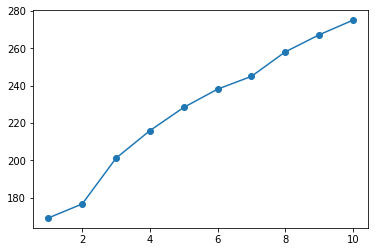

In [36]:
summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

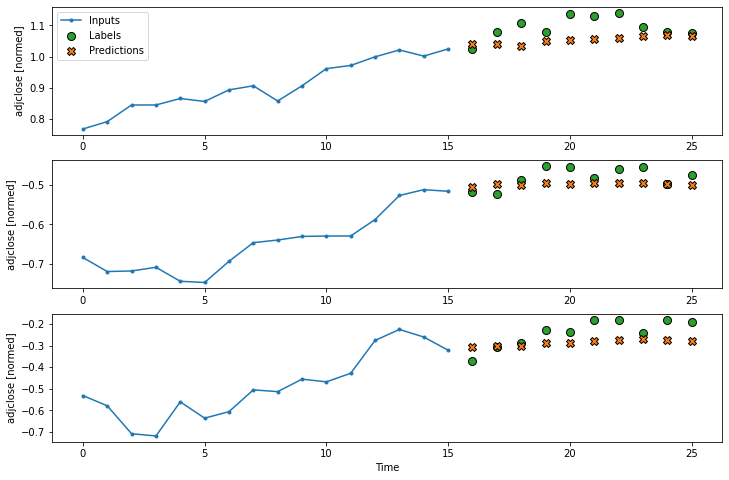

In [37]:
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

In [38]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_results_partial = functools.partial(plot_results, actuals, predictions, window)

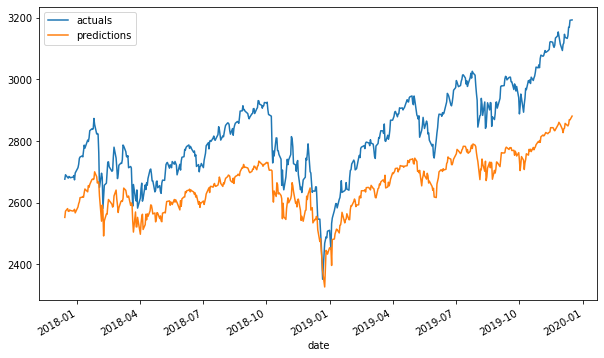

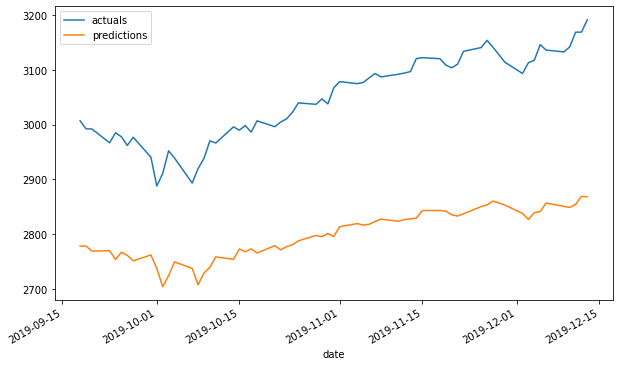

In [39]:
plot_results_partial()
plot_results_partial(day_slice=day_slice)

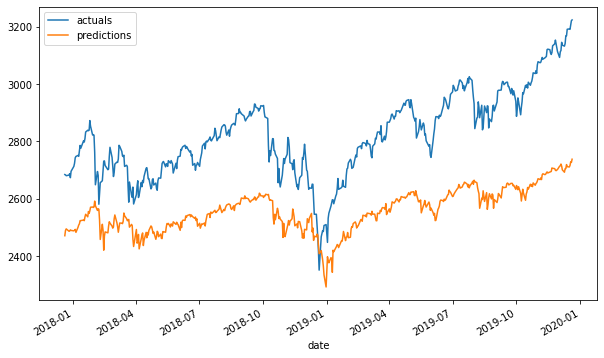

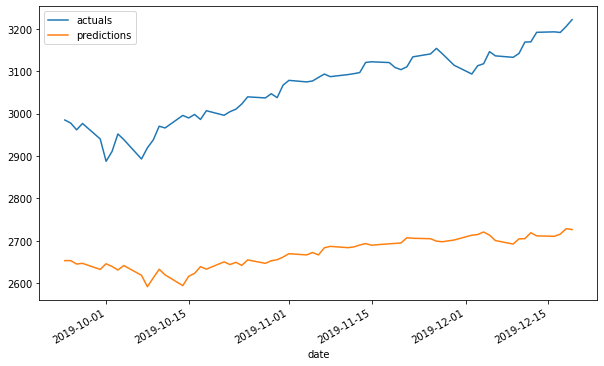

In [40]:
plot_results_partial(4)
plot_results_partial(4, day_slice=day_slice)

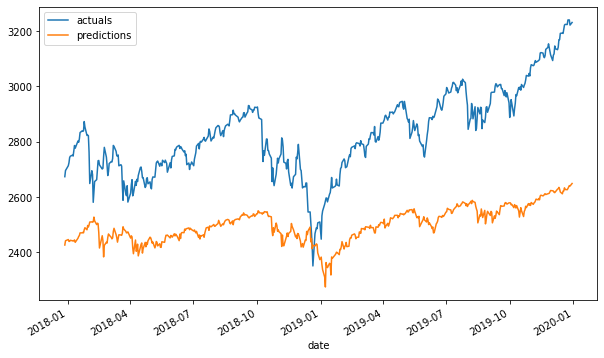

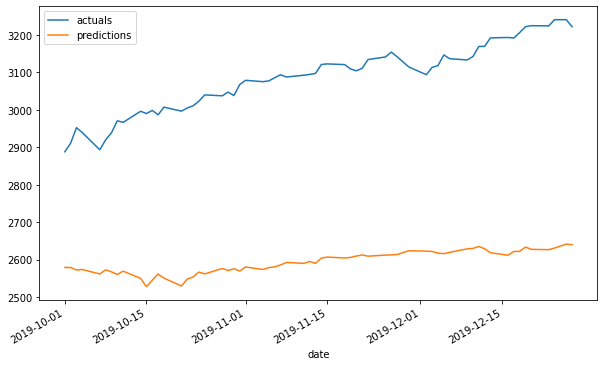

In [41]:
plot_results_partial(9)
plot_results_partial(9, day_slice=day_slice)

## TCN

In [86]:
model_name = "tcn"
model = build_model(model_name, window)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

Training:   0%|           0/1000 ETA: ?s,  ?epochs/s

Epoch 1/1000


0/132           ETA: ?s - 

Epoch 2/1000


0/132           ETA: ?s - 

Epoch 3/1000


0/132           ETA: ?s - 

Epoch 4/1000


0/132           ETA: ?s - 

Epoch 5/1000


0/132           ETA: ?s - 

Epoch 6/1000


0/132           ETA: ?s - 

Epoch 7/1000


0/132           ETA: ?s - 

Epoch 8/1000


0/132           ETA: ?s - 

Epoch 9/1000


0/132           ETA: ?s - 

Epoch 10/1000


0/132           ETA: ?s - 

Epoch 11/1000


0/132           ETA: ?s - 

Epoch 12/1000


0/132           ETA: ?s - 

Epoch 13/1000


0/132           ETA: ?s - 

Epoch 14/1000


0/132           ETA: ?s - 

Epoch 15/1000


0/132           ETA: ?s - 

Epoch 16/1000


0/132           ETA: ?s - 

Epoch 17/1000


0/132           ETA: ?s - 

Epoch 18/1000


0/132           ETA: ?s - 

Epoch 19/1000


0/132           ETA: ?s - 

Epoch 20/1000


0/132           ETA: ?s - 

Epoch 21/1000


0/132           ETA: ?s - 

Epoch 22/1000


0/132           ETA: ?s - 

Epoch 23/1000


0/132           ETA: ?s - 

Epoch 24/1000


0/132           ETA: ?s - 

Epoch 25/1000


0/132           ETA: ?s - 

Epoch 26/1000


0/132           ETA: ?s - 

Epoch 27/1000


0/132           ETA: ?s - 

Epoch 28/1000


0/132           ETA: ?s - 

Epoch 29/1000


0/132           ETA: ?s - 

Epoch 30/1000


0/132           ETA: ?s - 

Epoch 31/1000


0/132           ETA: ?s - 

Epoch 32/1000


0/132           ETA: ?s - 

Epoch 33/1000


0/132           ETA: ?s - 

Epoch 34/1000


0/132           ETA: ?s - 

Epoch 35/1000


0/132           ETA: ?s - 

Epoch 36/1000


0/132           ETA: ?s - 

Epoch 37/1000


0/132           ETA: ?s - 

Epoch 38/1000


0/132           ETA: ?s - 

Epoch 39/1000


0/132           ETA: ?s - 

Epoch 40/1000


0/132           ETA: ?s - 

Epoch 41/1000


0/132           ETA: ?s - 

Epoch 42/1000


0/132           ETA: ?s - 

Epoch 43/1000


0/132           ETA: ?s - 

Epoch 44/1000


0/132           ETA: ?s - 

Epoch 45/1000


0/132           ETA: ?s - 

Epoch 46/1000


0/132           ETA: ?s - 

Epoch 47/1000


0/132           ETA: ?s - 

Epoch 48/1000


0/132           ETA: ?s - 

Epoch 49/1000


0/132           ETA: ?s - 

Epoch 50/1000


0/132           ETA: ?s - 

Epoch 51/1000


0/132           ETA: ?s - 

Epoch 52/1000


0/132           ETA: ?s - 

Epoch 53/1000


0/132           ETA: ?s - 

Epoch 54/1000


0/132           ETA: ?s - 

Epoch 55/1000


0/132           ETA: ?s - 

Epoch 56/1000


0/132           ETA: ?s - 

Epoch 57/1000


0/132           ETA: ?s - 

Epoch 58/1000


0/132           ETA: ?s - 

Epoch 59/1000


0/132           ETA: ?s - 

Epoch 60/1000


0/132           ETA: ?s - 

Epoch 61/1000


0/132           ETA: ?s - 

Epoch 62/1000


0/132           ETA: ?s - 

Epoch 63/1000


0/132           ETA: ?s - 

Epoch 64/1000


0/132           ETA: ?s - 

Epoch 65/1000


0/132           ETA: ?s - 

Epoch 66/1000


0/132           ETA: ?s - 

Epoch 67/1000


0/132           ETA: ?s - 

Epoch 68/1000


0/132           ETA: ?s - 

Epoch 69/1000


0/132           ETA: ?s - 

Epoch 70/1000


0/132           ETA: ?s - 

Epoch 71/1000


0/132           ETA: ?s - 

Epoch 72/1000


0/132           ETA: ?s - 

Epoch 73/1000


0/132           ETA: ?s - 

Epoch 74/1000


0/132           ETA: ?s - 

Epoch 75/1000


0/132           ETA: ?s - 

Epoch 76/1000


0/132           ETA: ?s - 

Epoch 77/1000


0/132           ETA: ?s - 

Epoch 78/1000


0/132           ETA: ?s - 

Epoch 79/1000


0/132           ETA: ?s - 

Epoch 80/1000


0/132           ETA: ?s - 

Epoch 81/1000


0/132           ETA: ?s - 

Epoch 82/1000


0/132           ETA: ?s - 

Epoch 83/1000


0/132           ETA: ?s - 

Epoch 84/1000


0/132           ETA: ?s - 

Epoch 85/1000


0/132           ETA: ?s - 

Epoch 86/1000


0/132           ETA: ?s - 

Epoch 87/1000


0/132           ETA: ?s - 

Epoch 88/1000


0/132           ETA: ?s - 

Epoch 89/1000


0/132           ETA: ?s - 

Epoch 90/1000


0/132           ETA: ?s - 

Epoch 91/1000


0/132           ETA: ?s - 

Epoch 92/1000


0/132           ETA: ?s - 

Epoch 93/1000


0/132           ETA: ?s - 

Epoch 94/1000


0/132           ETA: ?s - 

Epoch 95/1000


0/132           ETA: ?s - 

Epoch 96/1000


0/132           ETA: ?s - 

Epoch 97/1000


0/132           ETA: ?s - 

Epoch 98/1000


0/132           ETA: ?s - 

Epoch 99/1000


0/132           ETA: ?s - 

Epoch 100/1000


0/132           ETA: ?s - 

Epoch 101/1000


0/132           ETA: ?s - 

Epoch 102/1000


0/132           ETA: ?s - 

Epoch 103/1000


0/132           ETA: ?s - 

Epoch 104/1000


0/132           ETA: ?s - 

Epoch 105/1000


0/132           ETA: ?s - 

Epoch 106/1000


0/132           ETA: ?s - 

Epoch 107/1000


0/132           ETA: ?s - 

Epoch 108/1000


0/132           ETA: ?s - 

Epoch 109/1000


0/132           ETA: ?s - 

Epoch 110/1000


0/132           ETA: ?s - 

Epoch 111/1000


0/132           ETA: ?s - 

Epoch 112/1000


0/132           ETA: ?s - 

Epoch 113/1000


0/132           ETA: ?s - 

Epoch 114/1000


0/132           ETA: ?s - 

Epoch 115/1000


0/132           ETA: ?s - 

Epoch 116/1000


0/132           ETA: ?s - 

Epoch 117/1000


0/132           ETA: ?s - 

Epoch 118/1000


0/132           ETA: ?s - 

Epoch 119/1000


0/132           ETA: ?s - 

Epoch 120/1000


0/132           ETA: ?s - 

Epoch 121/1000


0/132           ETA: ?s - 

Epoch 122/1000


0/132           ETA: ?s - 

Epoch 123/1000


0/132           ETA: ?s - 

Epoch 124/1000


0/132           ETA: ?s - 

Epoch 125/1000


0/132           ETA: ?s - 

Epoch 126/1000


0/132           ETA: ?s - 

Epoch 127/1000


0/132           ETA: ?s - 

Epoch 128/1000


0/132           ETA: ?s - 

Epoch 129/1000


0/132           ETA: ?s - 

Epoch 130/1000


0/132           ETA: ?s - 

Epoch 131/1000


0/132           ETA: ?s - 

Epoch 132/1000


0/132           ETA: ?s - 

Epoch 133/1000


0/132           ETA: ?s - 

Epoch 134/1000


0/132           ETA: ?s - 

Epoch 135/1000


0/132           ETA: ?s - 

Epoch 136/1000


0/132           ETA: ?s - 

Epoch 137/1000


0/132           ETA: ?s - 

Epoch 138/1000


0/132           ETA: ?s - 

Epoch 139/1000


0/132           ETA: ?s - 

Epoch 140/1000


0/132           ETA: ?s - 

Epoch 141/1000


0/132           ETA: ?s - 

Epoch 142/1000


0/132           ETA: ?s - 

Epoch 143/1000


0/132           ETA: ?s - 

Epoch 144/1000


0/132           ETA: ?s - 

Epoch 145/1000


0/132           ETA: ?s - 

Epoch 146/1000


0/132           ETA: ?s - 

Epoch 147/1000


0/132           ETA: ?s - 

Epoch 148/1000


0/132           ETA: ?s - 

Epoch 149/1000


0/132           ETA: ?s - 

Epoch 150/1000


0/132           ETA: ?s - 

Epoch 151/1000


0/132           ETA: ?s - 

Epoch 152/1000


0/132           ETA: ?s - 

Epoch 153/1000


0/132           ETA: ?s - 

Epoch 154/1000


0/132           ETA: ?s - 

Epoch 155/1000


0/132           ETA: ?s - 

Epoch 156/1000


0/132           ETA: ?s - 

Epoch 157/1000


0/132           ETA: ?s - 

Epoch 158/1000


0/132           ETA: ?s - 

Epoch 159/1000


0/132           ETA: ?s - 

Epoch 160/1000


0/132           ETA: ?s - 

Epoch 161/1000


0/132           ETA: ?s - 

Epoch 162/1000


0/132           ETA: ?s - 

Epoch 163/1000


0/132           ETA: ?s - 

Epoch 164/1000


0/132           ETA: ?s - 

Epoch 165/1000


0/132           ETA: ?s - 

Epoch 166/1000


0/132           ETA: ?s - 

Epoch 167/1000


0/132           ETA: ?s - 

Epoch 168/1000


0/132           ETA: ?s - 

Epoch 169/1000


0/132           ETA: ?s - 

Epoch 170/1000


0/132           ETA: ?s - 

Epoch 171/1000


0/132           ETA: ?s - 

Epoch 172/1000


0/132           ETA: ?s - 

Epoch 173/1000


0/132           ETA: ?s - 

Epoch 174/1000


0/132           ETA: ?s - 

Epoch 175/1000


0/132           ETA: ?s - 

Epoch 176/1000


0/132           ETA: ?s - 

Epoch 177/1000


0/132           ETA: ?s - 

Epoch 178/1000


0/132           ETA: ?s - 

Epoch 179/1000


0/132           ETA: ?s - 

Epoch 180/1000


0/132           ETA: ?s - 

Epoch 181/1000


0/132           ETA: ?s - 

Epoch 182/1000


0/132           ETA: ?s - 

Epoch 183/1000


0/132           ETA: ?s - 

Epoch 184/1000


0/132           ETA: ?s - 

Epoch 185/1000


0/132           ETA: ?s - 

Epoch 186/1000


0/132           ETA: ?s - 

Epoch 187/1000


0/132           ETA: ?s - 

Epoch 188/1000


0/132           ETA: ?s - 

Epoch 189/1000


0/132           ETA: ?s - 

Epoch 190/1000


0/132           ETA: ?s - 

Epoch 191/1000


0/132           ETA: ?s - 

Epoch 192/1000


0/132           ETA: ?s - 

Epoch 193/1000


0/132           ETA: ?s - 

Epoch 194/1000


0/132           ETA: ?s - 

Epoch 195/1000


0/132           ETA: ?s - 

Epoch 196/1000


0/132           ETA: ?s - 

Epoch 197/1000


0/132           ETA: ?s - 

Epoch 198/1000


0/132           ETA: ?s - 

Epoch 199/1000


0/132           ETA: ?s - 

Epoch 200/1000


0/132           ETA: ?s - 

Epoch 201/1000


0/132           ETA: ?s - 

Epoch 202/1000


0/132           ETA: ?s - 

Epoch 203/1000


0/132           ETA: ?s - 

Epoch 204/1000


0/132           ETA: ?s - 

Epoch 205/1000


0/132           ETA: ?s - 

Epoch 206/1000


0/132           ETA: ?s - 

Epoch 207/1000


0/132           ETA: ?s - 

Epoch 208/1000


0/132           ETA: ?s - 

Epoch 209/1000


0/132           ETA: ?s - 

Restoring model weights from the end of the best epoch: 109.
Epoch 00209: early stopping


tcn: [44.230] 1: 26.3, 2: 31.5, 3: 35.9, 4: 39.6, 5: 43.0, 6: 46.1, 7: 48.7, 8: 51.4, 9: 53.8, 10: 56.1


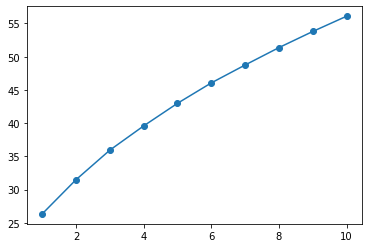

In [43]:
summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

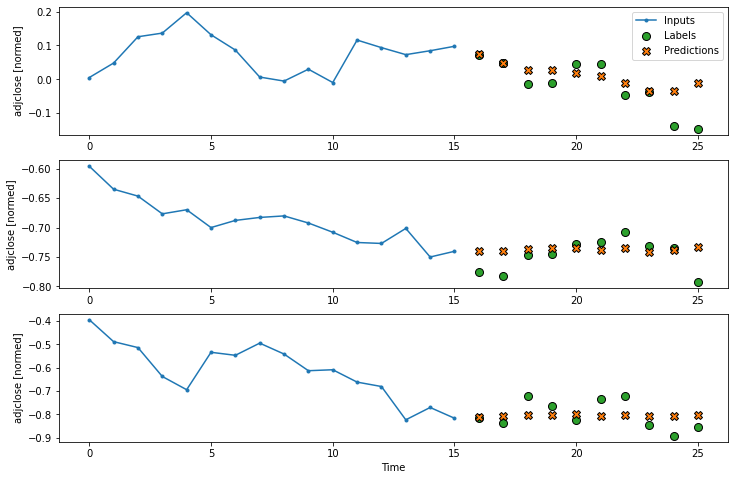

In [44]:
window._example = None
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

In [45]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_results_partial = functools.partial(plot_results, actuals, predictions, window)

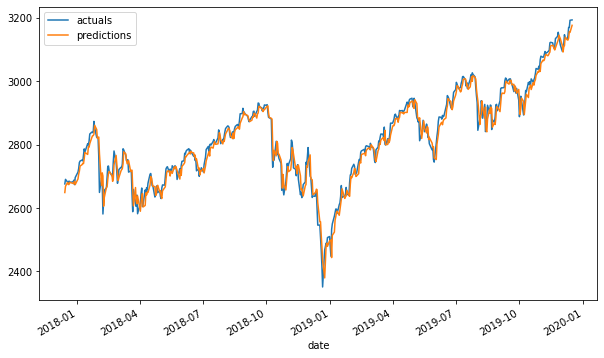

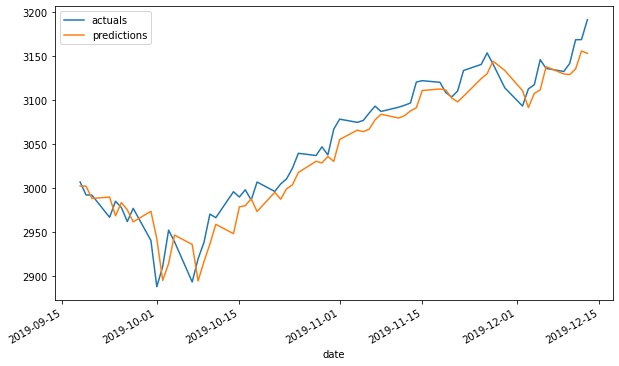

In [76]:
plot_results_partial()
plot_results_partial(day_slice=day_slice)

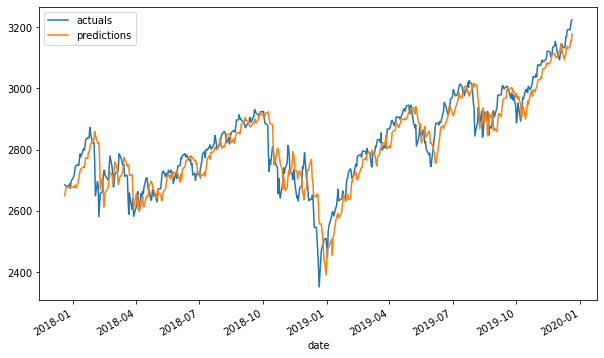

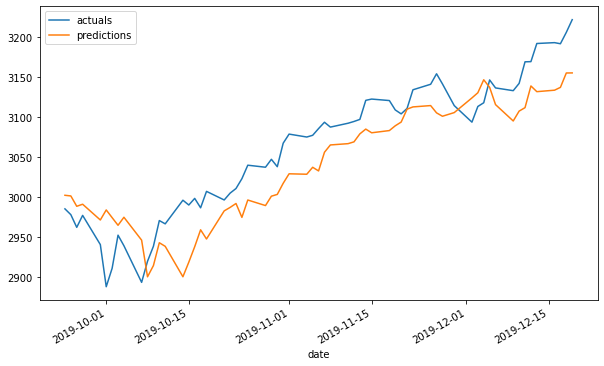

In [47]:
plot_results_partial(4)
plot_results_partial(4, day_slice=day_slice)

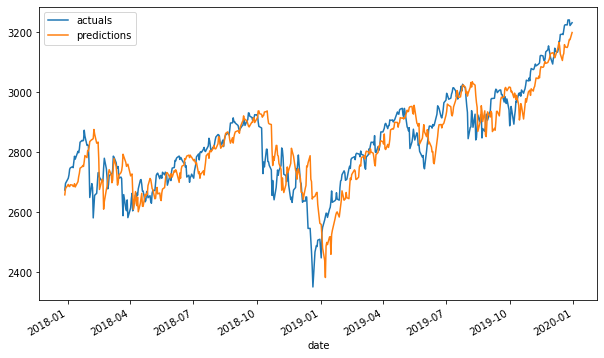

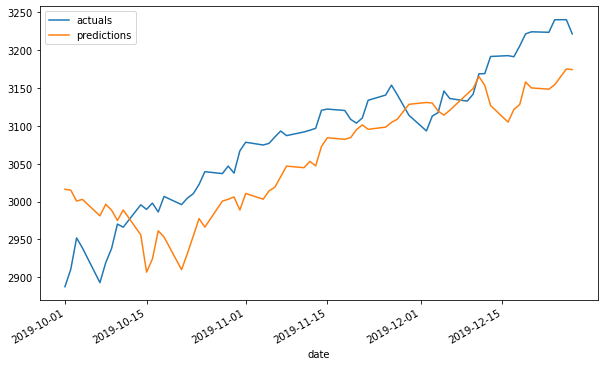

In [48]:
plot_results_partial(9)
plot_results_partial(9, day_slice=day_slice)

## N-Beats

In [49]:
model_name = "nbeats"
model = build_model(model_name, window)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

Training:   0%|           0/1000 ETA: ?s,  ?epochs/s

Epoch 1/1000


0/132           ETA: ?s - 

Epoch 2/1000


0/132           ETA: ?s - 

Epoch 3/1000


0/132           ETA: ?s - 

Epoch 4/1000


0/132           ETA: ?s - 

Epoch 5/1000


0/132           ETA: ?s - 

Epoch 6/1000


0/132           ETA: ?s - 

Epoch 7/1000


0/132           ETA: ?s - 

Epoch 8/1000


0/132           ETA: ?s - 

Epoch 9/1000


0/132           ETA: ?s - 

Epoch 10/1000


0/132           ETA: ?s - 

Epoch 11/1000


0/132           ETA: ?s - 

Epoch 12/1000


0/132           ETA: ?s - 

Epoch 13/1000


0/132           ETA: ?s - 

Epoch 14/1000


0/132           ETA: ?s - 

Epoch 15/1000


0/132           ETA: ?s - 

Epoch 16/1000


0/132           ETA: ?s - 

Epoch 17/1000


0/132           ETA: ?s - 

Epoch 18/1000


0/132           ETA: ?s - 

Epoch 19/1000


0/132           ETA: ?s - 

Epoch 20/1000


0/132           ETA: ?s - 

Epoch 21/1000


0/132           ETA: ?s - 

Epoch 22/1000


0/132           ETA: ?s - 

Epoch 23/1000


0/132           ETA: ?s - 

Epoch 24/1000


0/132           ETA: ?s - 

Epoch 25/1000


0/132           ETA: ?s - 

Epoch 26/1000


0/132           ETA: ?s - 

Epoch 27/1000


0/132           ETA: ?s - 

Epoch 28/1000


0/132           ETA: ?s - 

Epoch 29/1000


0/132           ETA: ?s - 

Epoch 30/1000


0/132           ETA: ?s - 

Epoch 31/1000


0/132           ETA: ?s - 

Epoch 32/1000


0/132           ETA: ?s - 

Epoch 33/1000


0/132           ETA: ?s - 

Epoch 34/1000


0/132           ETA: ?s - 

Epoch 35/1000


0/132           ETA: ?s - 

Epoch 36/1000


0/132           ETA: ?s - 

Epoch 37/1000


0/132           ETA: ?s - 

Epoch 38/1000


0/132           ETA: ?s - 

Epoch 39/1000


0/132           ETA: ?s - 

Epoch 40/1000


0/132           ETA: ?s - 

Epoch 41/1000


0/132           ETA: ?s - 

Epoch 42/1000


0/132           ETA: ?s - 

Epoch 43/1000


0/132           ETA: ?s - 

Epoch 44/1000


0/132           ETA: ?s - 

Epoch 45/1000


0/132           ETA: ?s - 

Epoch 46/1000


0/132           ETA: ?s - 

Epoch 47/1000


0/132           ETA: ?s - 

Epoch 48/1000


0/132           ETA: ?s - 

Epoch 49/1000


0/132           ETA: ?s - 

Epoch 50/1000


0/132           ETA: ?s - 

Epoch 51/1000


0/132           ETA: ?s - 

Epoch 52/1000


0/132           ETA: ?s - 

Epoch 53/1000


0/132           ETA: ?s - 

Epoch 54/1000


0/132           ETA: ?s - 

Epoch 55/1000


0/132           ETA: ?s - 

Epoch 56/1000


0/132           ETA: ?s - 

Epoch 57/1000


0/132           ETA: ?s - 

Epoch 58/1000


0/132           ETA: ?s - 

Epoch 59/1000


0/132           ETA: ?s - 

Epoch 60/1000


0/132           ETA: ?s - 

Epoch 61/1000


0/132           ETA: ?s - 

Epoch 62/1000


0/132           ETA: ?s - 

Epoch 63/1000


0/132           ETA: ?s - 

Epoch 64/1000


0/132           ETA: ?s - 

Epoch 65/1000


0/132           ETA: ?s - 

Epoch 66/1000


0/132           ETA: ?s - 

Epoch 67/1000


0/132           ETA: ?s - 

Epoch 68/1000


0/132           ETA: ?s - 

Epoch 69/1000


0/132           ETA: ?s - 

Epoch 70/1000


0/132           ETA: ?s - 

Epoch 71/1000


0/132           ETA: ?s - 

Epoch 72/1000


0/132           ETA: ?s - 

Epoch 73/1000


0/132           ETA: ?s - 

Epoch 74/1000


0/132           ETA: ?s - 

Epoch 75/1000


0/132           ETA: ?s - 

Epoch 76/1000


0/132           ETA: ?s - 

Epoch 77/1000


0/132           ETA: ?s - 

Epoch 78/1000


0/132           ETA: ?s - 

Epoch 79/1000


0/132           ETA: ?s - 

Epoch 80/1000


0/132           ETA: ?s - 

Epoch 81/1000


0/132           ETA: ?s - 

Epoch 82/1000


0/132           ETA: ?s - 

Epoch 83/1000


0/132           ETA: ?s - 

Epoch 84/1000


0/132           ETA: ?s - 

Epoch 85/1000


0/132           ETA: ?s - 

Epoch 86/1000


0/132           ETA: ?s - 

Epoch 87/1000


0/132           ETA: ?s - 

Epoch 88/1000


0/132           ETA: ?s - 

Epoch 89/1000


0/132           ETA: ?s - 

Epoch 90/1000


0/132           ETA: ?s - 

Epoch 91/1000


0/132           ETA: ?s - 

Epoch 92/1000


0/132           ETA: ?s - 

Epoch 93/1000


0/132           ETA: ?s - 

Epoch 94/1000


0/132           ETA: ?s - 

Epoch 95/1000


0/132           ETA: ?s - 

Epoch 96/1000


0/132           ETA: ?s - 

Epoch 97/1000


0/132           ETA: ?s - 

Epoch 98/1000


0/132           ETA: ?s - 

Epoch 99/1000


0/132           ETA: ?s - 

Epoch 100/1000


0/132           ETA: ?s - 

Epoch 101/1000


0/132           ETA: ?s - 

Epoch 102/1000


0/132           ETA: ?s - 

Epoch 103/1000


0/132           ETA: ?s - 

Epoch 104/1000


0/132           ETA: ?s - 

Epoch 105/1000


0/132           ETA: ?s - 

Epoch 106/1000


0/132           ETA: ?s - 

Epoch 107/1000


0/132           ETA: ?s - 

Epoch 108/1000


0/132           ETA: ?s - 

Epoch 109/1000


0/132           ETA: ?s - 

Epoch 110/1000


0/132           ETA: ?s - 

Epoch 111/1000


0/132           ETA: ?s - 

Epoch 112/1000


0/132           ETA: ?s - 

Restoring model weights from the end of the best epoch: 12.
Epoch 00112: early stopping


nbeats: [49.981] 1: 31.3, 2: 39.5, 3: 42.0, 4: 45.5, 5: 48.6, 6: 51.0, 7: 53.4, 8: 57.1, 9: 60.2, 10: 62.5


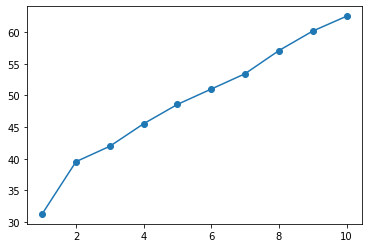

In [74]:
summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

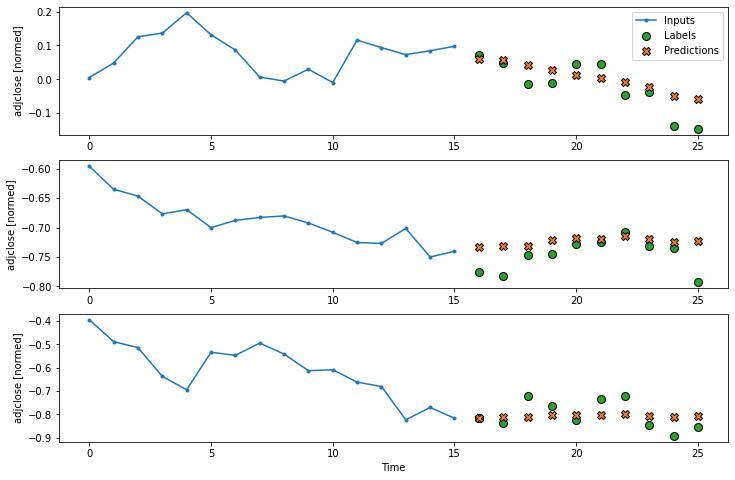

In [69]:
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

In [70]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_results_partial = functools.partial(plot_results, actuals, predictions, window)

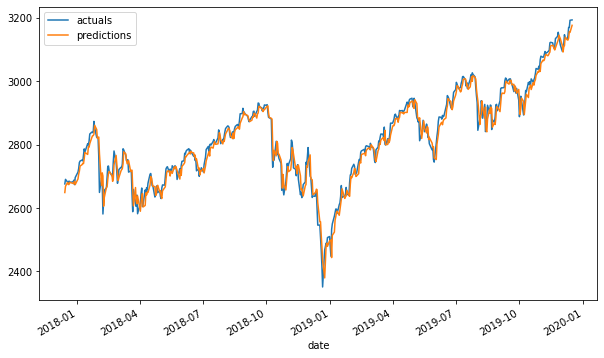

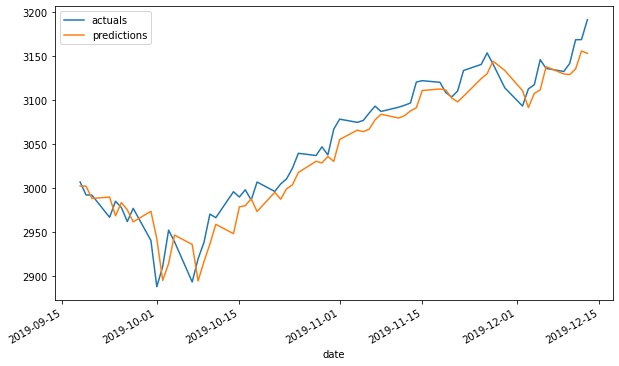

In [71]:
plot_results_partial()
plot_results_partial(day_slice=day_slice)

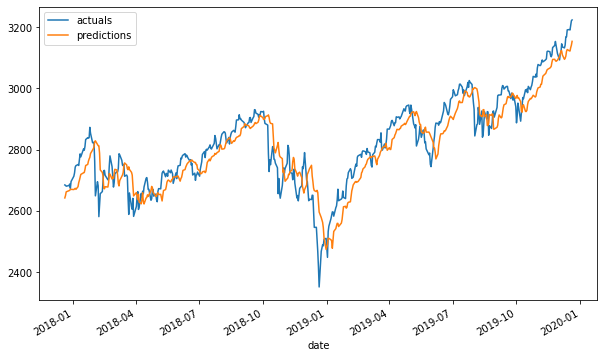

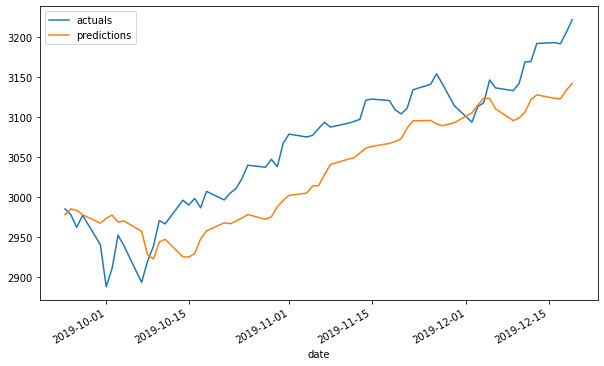

In [54]:
plot_results_partial(4)
plot_results_partial(4, day_slice=day_slice)

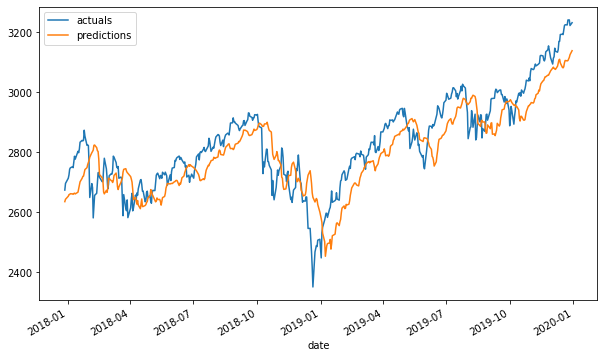

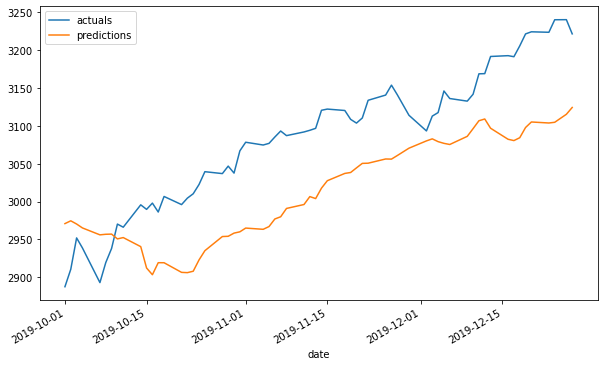

In [55]:
plot_results_partial(9)
plot_results_partial(9, day_slice=day_slice)

## Summary of Results

In [77]:
model_summaries = {}

for model_name in score_map.keys():
    score, scores = score_map[model_name]

    model_summary = {"rmse_overall": score}
    for i, s in enumerate(scores):
        model_summary[f"rmse t+{i + 1}"] = s

    model_summaries[model_name] = model_summary

pd.DataFrame.from_dict(model_summaries, orient="index").sort_values("rmse_overall")

,rmse_overall,rmse t+1,rmse t+2,rmse t+3,rmse t+4,rmse t+5,rmse t+6,rmse t+7,rmse t+8,rmse t+9,rmse t+10
last,43.692947,25.730577,30.865131,34.958904,38.762096,42.236774,45.351604,48.207355,50.961510,53.504841,55.918568
tcn,44.721646,27.077248,33.361973,36.735752,40.134239,43.334717,46.254292,48.988136,51.649796,54.059238,56.448986
nbeats,49.981157,31.267462,39.528763,41.962387,45.523952,48.584930,51.007965,53.436577,57.092171,60.177593,62.522614
repeat,77.258018,77.115364,77.147644,77.180489,77.206474,77.235550,77.267731,77.306534,77.343124,77.375008,77.401711
lstm,230.089983,169.281448,176.742966,201.246948,215.939804,228.345169,238.121628,244.943344,258.012665,267.141998,274.978790


## Tune model

In [61]:
max_trials = 128

tuner = kt.RandomSearch(
    build_model_for_tuning,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_trials=max_trials,
    overwrite=True,
    project_name="s+p-500-forecasting"
)

tuner.search(window.train(), validation_data=window.val())

Trial 67 Complete [00h 00m 08s]
val_root_mean_squared_error: 0.3045767843723297

Best val_root_mean_squared_error So Far: 0.14217692613601685
Total elapsed time: 00h 10m 30s
INFO:tensorflow:Oracle triggered exit


In [62]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 256)               5051648   
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
Total params: 5,054,218
Trainable params: 5,054,218
Non-trainable params: 0
_________________________________________________________________


In [63]:
tuner.results_summary()

Results summary
Results in ./s+p-500-forecasting
Showing 10 best trials
Objective(name='val_root_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
nb_filters: 256
kernel_size: 7
dropout_rate: 0.0
Score: 0.14217692613601685
Trial summary
Hyperparameters:
nb_filters: 64
kernel_size: 6
dropout_rate: 0.0
Score: 0.16614684462547302
Trial summary
Hyperparameters:
nb_filters: 64
kernel_size: 8
dropout_rate: 0.05
Score: 0.1813080757856369
Trial summary
Hyperparameters:
nb_filters: 192
kernel_size: 8
dropout_rate: 0.1
Score: 0.18603086471557617
Trial summary
Hyperparameters:
nb_filters: 96
kernel_size: 8
dropout_rate: 0.1
Score: 0.19475111365318298
Trial summary
Hyperparameters:
nb_filters: 128
kernel_size: 8
dropout_rate: 0.05
Score: 0.19925038516521454
Trial summary
Hyperparameters:
nb_filters: 96
kernel_size: 8
dropout_rate: 0.05
Score: 0.20332685112953186
Trial summary
Hyperparameters:
nb_filters: 128
kernel_size: 8
dropout_rate: 0.1
Score: 0.21289628744125366
Trial summa

## Evaluate tuned model

In [78]:
# model_name = "tuned_tcn"
# #model = build_model(model_name, window, patience=50)
# #model = load_saved_model(model_name)

# score, scores = evaluate_model(model, window, scaler)
# score_map[model_name] = score, scores

In [ ]:
model_name = "tuned_tcn"
model = build_model(model_name, window)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

Training:   0%|           0/1000 ETA: ?s,  ?epochs/s

Epoch 1/1000


0/132           ETA: ?s - 

Epoch 2/1000


0/132           ETA: ?s - 

Epoch 3/1000


0/132           ETA: ?s - 

Epoch 4/1000


0/132           ETA: ?s - 

Epoch 5/1000


0/132           ETA: ?s - 

Epoch 6/1000


0/132           ETA: ?s - 

Epoch 7/1000


0/132           ETA: ?s - 

Epoch 8/1000


0/132           ETA: ?s - 

Epoch 9/1000


0/132           ETA: ?s - 

Epoch 10/1000


0/132           ETA: ?s - 

Epoch 11/1000


0/132           ETA: ?s - 

Epoch 12/1000


0/132           ETA: ?s - 

Epoch 13/1000


0/132           ETA: ?s - 

Epoch 14/1000


0/132           ETA: ?s - 

Epoch 15/1000


0/132           ETA: ?s - 

Epoch 16/1000


0/132           ETA: ?s - 

Epoch 17/1000


0/132           ETA: ?s - 

Epoch 18/1000


0/132           ETA: ?s - 

Epoch 19/1000


0/132           ETA: ?s - 

Epoch 20/1000


0/132           ETA: ?s - 

Epoch 21/1000


0/132           ETA: ?s - 

Epoch 22/1000


0/132           ETA: ?s - 

Epoch 23/1000


0/132           ETA: ?s - 

Epoch 24/1000


0/132           ETA: ?s - 

Epoch 25/1000


0/132           ETA: ?s - 

Epoch 26/1000


0/132           ETA: ?s - 

Epoch 27/1000


0/132           ETA: ?s - 

Epoch 28/1000


0/132           ETA: ?s - 

Epoch 29/1000


0/132           ETA: ?s - 

Epoch 30/1000


0/132           ETA: ?s - 

Epoch 31/1000


0/132           ETA: ?s - 

Epoch 32/1000


0/132           ETA: ?s - 

Epoch 33/1000


0/132           ETA: ?s - 

Epoch 34/1000


0/132           ETA: ?s - 

Epoch 35/1000


0/132           ETA: ?s - 

Epoch 36/1000


0/132           ETA: ?s - 

Epoch 37/1000


0/132           ETA: ?s - 

Epoch 38/1000


0/132           ETA: ?s - 

Epoch 39/1000


0/132           ETA: ?s - 

Epoch 40/1000


0/132           ETA: ?s - 

Epoch 41/1000


0/132           ETA: ?s - 

Epoch 42/1000


0/132           ETA: ?s - 

In [ ]:
summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

In [ ]:
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

In [ ]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_results_partial = functools.partial(plot_results, actuals, predictions, window)

In [ ]:
plot_results_partial()
plot_results_partial(day_slice=day_slice)

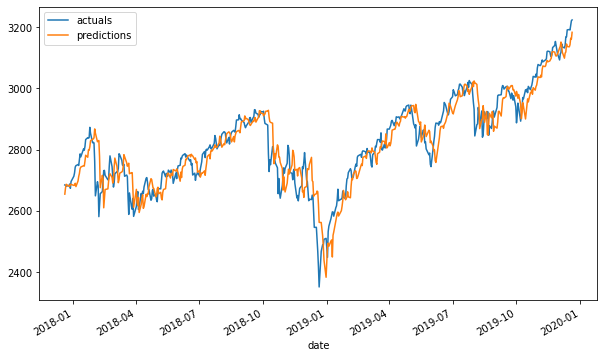

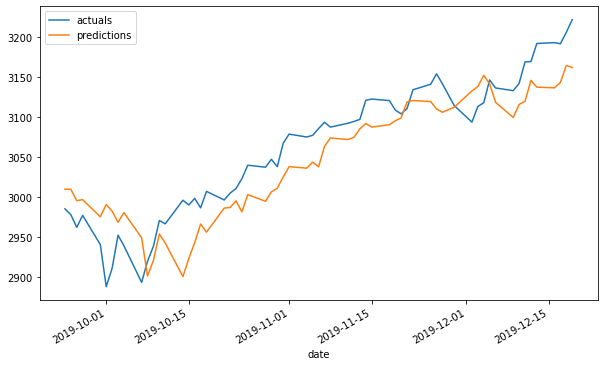

In [83]:
plot_results_partial(4)
plot_results_partial(4, day_slice=day_slice)

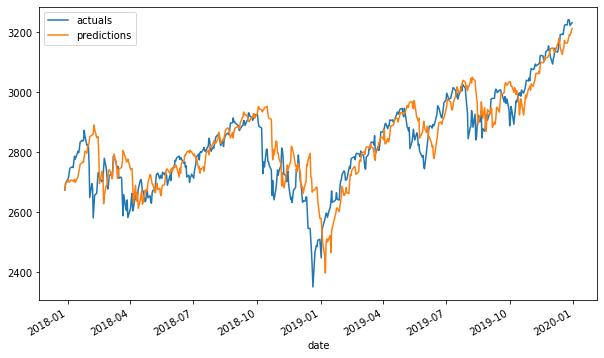

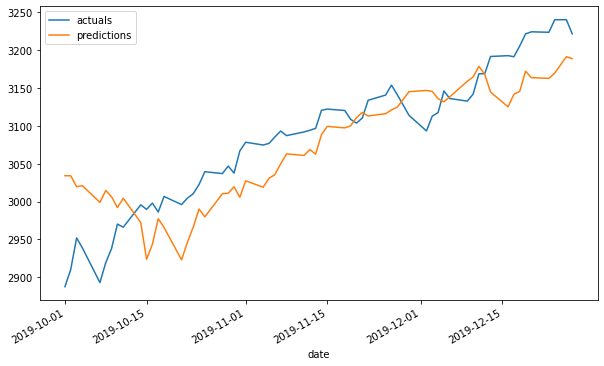

In [84]:
plot_results_partial(9)
plot_results_partial(9, day_slice=day_slice)

In [85]:
model_summaries = {}

for model_name in score_map.keys():
    score, scores = score_map[model_name]

    model_summary = {"rmse_overall": score}
    for i, s in enumerate(scores):
        model_summary[f"rmse t+{i + 1}"] = s

    model_summaries[model_name] = model_summary

pd.DataFrame.from_dict(model_summaries, orient="index").sort_values("rmse_overall")

,rmse_overall,rmse t+1,rmse t+2,rmse t+3,rmse t+4,rmse t+5,rmse t+6,rmse t+7,rmse t+8,rmse t+9,rmse t+10
last,43.692947,25.730577,30.865131,34.958904,38.762096,42.236774,45.351604,48.207355,50.961510,53.504841,55.918568
tcn,44.721646,27.077248,33.361973,36.735752,40.134239,43.334717,46.254292,48.988136,51.649796,54.059238,56.448986
tuned_tcn,44.721646,27.077248,33.361973,36.735752,40.134239,43.334717,46.254292,48.988136,51.649796,54.059238,56.448986
nbeats,49.981157,31.267462,39.528763,41.962387,45.523952,48.584930,51.007965,53.436577,57.092171,60.177593,62.522614
repeat,77.258018,77.115364,77.147644,77.180489,77.206474,77.235550,77.267731,77.306534,77.343124,77.375008,77.401711
lstm,230.089983,169.281448,176.742966,201.246948,215.939804,228.345169,238.121628,244.943344,258.012665,267.141998,274.978790


## Save model

In [ ]:
model_name = 'tuned_tcn'

model.save(f"bin/{model_name}")

# Save scaler for use in processing requests
with open("bin/scaler.bin", "wb") as scaler_bin:
    pickle.dump(scaler, scaler_bin)

# save for use in test client to randomly create request input
window.test_df.to_pickle("bin/test.bin")